<a href="https://colab.research.google.com/github/umairakhtar/Colab-INFO7374-Assignment2/blob/master/Assignment2_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, zipfile, io, requests
URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
def download_images(url):
    r = requests.get(url, stream=True)
    print ('Downloading ' + url )
    zip_ref = zipfile.ZipFile(io.BytesIO(r.content))
    zip_ref.extractall('./')
    zip_ref.close()
download_images(URL) #To download

In [1]:
import numpy as np
from PIL import Image
import six.moves.cPickle as pickle

data = {}
data['train'] = {}
data['test'] = {}
data['train']['data'] = []
data['train']['target'] = []
data['test']['data'] = []
data['test']['target'] = []
size = (32, 32)
N = 400 ##400 as testing and 100 as training in each class

wnids = list(map(lambda x: x.strip(), open('tiny-imagenet-200/wnids.txt').readlines()))

for i in range(len(wnids)):
    wnid = wnids[i]
    print ("{}: {} / {}".format(wnid, i + 1, len(wnids)))
    for j in range(500):
        path = "tiny-imagenet-200/train/{0}/images/{0}_{1}.JPEG".format(wnid, j)
        image = (Image.open(path).convert('RGB'))
        image = image.resize(size, Image.ANTIALIAS)
        image = np.array(image)
        if j < N:
            data['train']['data'].append(image)
            data['train']['target'].append(i)
        else:
            data['test']['data'].append(image)
            data['test']['target'].append(i)
            

print ("Dump to train.pkl...")
pickle.dump(data, open('train.pkl', 'wb', -1))

n02124075: 1 / 200
n04067472: 2 / 200
n04540053: 3 / 200
n04099969: 4 / 200
n07749582: 5 / 200
n01641577: 6 / 200
n02802426: 7 / 200
n09246464: 8 / 200
n07920052: 9 / 200
n03970156: 10 / 200
n03891332: 11 / 200
n02106662: 12 / 200
n03201208: 13 / 200
n02279972: 14 / 200
n02132136: 15 / 200
n04146614: 16 / 200
n07873807: 17 / 200
n02364673: 18 / 200
n04507155: 19 / 200
n03854065: 20 / 200
n03838899: 21 / 200
n03733131: 22 / 200
n01443537: 23 / 200
n07875152: 24 / 200
n03544143: 25 / 200
n09428293: 26 / 200
n03085013: 27 / 200
n02437312: 28 / 200
n07614500: 29 / 200
n03804744: 30 / 200
n04265275: 31 / 200
n02963159: 32 / 200
n02486410: 33 / 200
n01944390: 34 / 200
n09256479: 35 / 200
n02058221: 36 / 200
n04275548: 37 / 200
n02321529: 38 / 200
n02769748: 39 / 200
n02099712: 40 / 200
n07695742: 41 / 200
n02056570: 42 / 200
n02281406: 43 / 200
n01774750: 44 / 200
n02509815: 45 / 200
n03983396: 46 / 200
n07753592: 47 / 200
n04254777: 48 / 200
n02233338: 49 / 200
n04008634: 50 / 200
n02823428

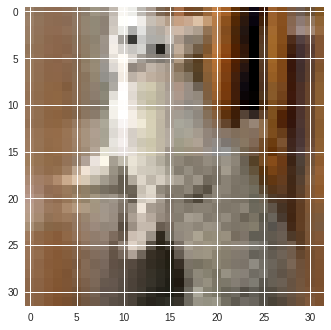

2


In [2]:
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
data=pickle.load(open("train.pkl",'rb'))
#data['train']['data'][750]
plt.imshow(data['train']['data'][50])
plt.show()
print(data['train']['target'][950])

In [3]:
import densenet

# 'th' dim-ordering or 'tf' dim-ordering
image_dim = (32, 32, 3) #or image_dim = (224, 224, 3)

model = densenet.DenseNetImageNet121(input_shape=image_dim)
model.summary()

Using TensorFlow backend.


Weights for the model were loaded successfully
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   9408        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 16, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 16, 16, 64)   0           batch_normalization_1[0][0]      
______________________________________________________________

In [0]:
import keras
from keras.optimizers import Adam
import pandas as pd
(x_train, y_train), (x_test, y_test) = (data['train']['data'],data['train']['target']),(data['test']['data'],data['test']['target'])
num_classes=1000
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train =x_train/ 255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Hyperparameters
batch_size = 250
epochs = 2

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 80000 samples, validate on 20000 samples
Epoch 1/2
80000/80000 [==============================] - 3360s 42ms/step - loss: 5.1644 - acc: 0.0551 - val_loss: 7.4037 - val_acc: 0.0198
Epoch 2/2
 5500/80000 [=>............................] - ETA: 49:08 - loss: 4.6212 - acc: 0.1053

Train result summary on mutliple models:

//128, 5, Adam

loss: 4.9460 - acc: 0.0776 - val_loss: 8.2566 - val_acc: 0.0326

loss: 4.8382 - acc: 0.0824 - val_loss: 4.5104 - val_acc: 0.0840

loss: 4.7583 - acc: 0.0964 - val_loss: 4.7787 - val_acc: 0.0724

loss: 4.7096 - acc: 0.1024 - val_loss: 6.1480 - val_acc: 0.0267

loss: 4.6861 - acc: 0.1054 - val_loss: 4.8637 - val_acc: 0.0804

---------------------------------------------------------------------------------------------
//128, 10, Adamax

loss: 5.4506 - acc: 0.0301 - val_loss: 13.3822 - val_acc: 0.0117

loss: 5.0313 - acc: 0.0657 - val_loss: 14.0670 - val_acc: 0.0069

loss: 4.9756 - acc: 0.0718 - val_loss: 5.5133 - val_acc: 0.0345

loss: 4.8447 - acc: 0.0872 - val_loss: 4.9688 - val_acc: 0.0957

loss: 4.5921 - acc: 0.1124 - val_loss: 12.3114 - val_acc: 0.0125

loss: 4.5202 - acc: 0.1253 - val_loss: 4.4203 - val_acc: 0.1267

loss: 4.2274 - acc: 0.1567 - val_loss: 4.1813 - val_acc: 0.1613

loss: 4.0046 - acc: 0.1858 - val_loss: 3.9098 - val_acc: 0.1901

loss: 4.2188 - acc: 0.1609 - val_loss: 5.9865 - val_acc: 0.0282

loss: 4.4415 - acc: 0.1373 - val_loss: 4.1231 - val_acc: 0.1752
_____________________________________________________________

//250, 2, Adam

loss: 5.1644 - acc: 0.0551 - val_loss: 7.4037 - val_acc: 0.0198

loss: 4.6212 - acc: 0.1053
